<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Candidate/TIC_149598862_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [1]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_2.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.006)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 149598862
period = 1.1090040277252  # Orbital period in days
epoch = 2088.74928560792
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.05]
folded_lc = folded_lc[folded_lc.time > -0.05]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_149598862_all_sector_lightcurve.csv


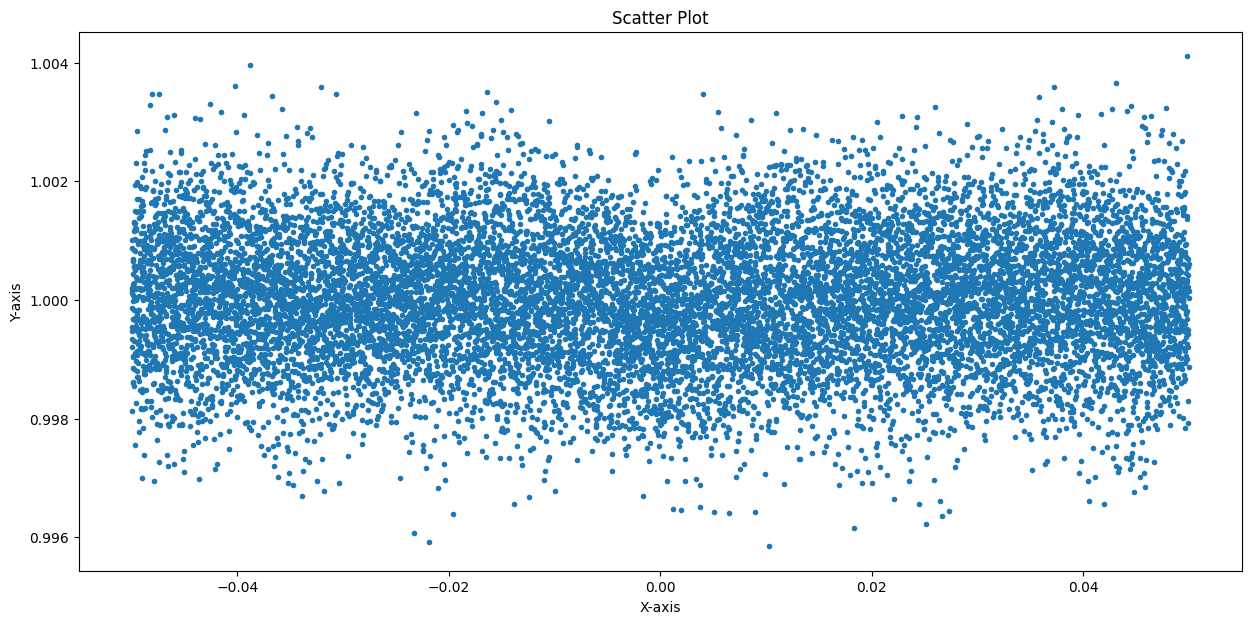

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [4]:
ID = tic_id
sectors = np.array([29, 30, 31, 32, 33, 34, 36, 37, 39])
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-5-b4efc3c8dd7a>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_29, ap_30, ap_31, ap_32, ap_33, ap_34, ap_36, ap_37, ap_39])


Sector 29


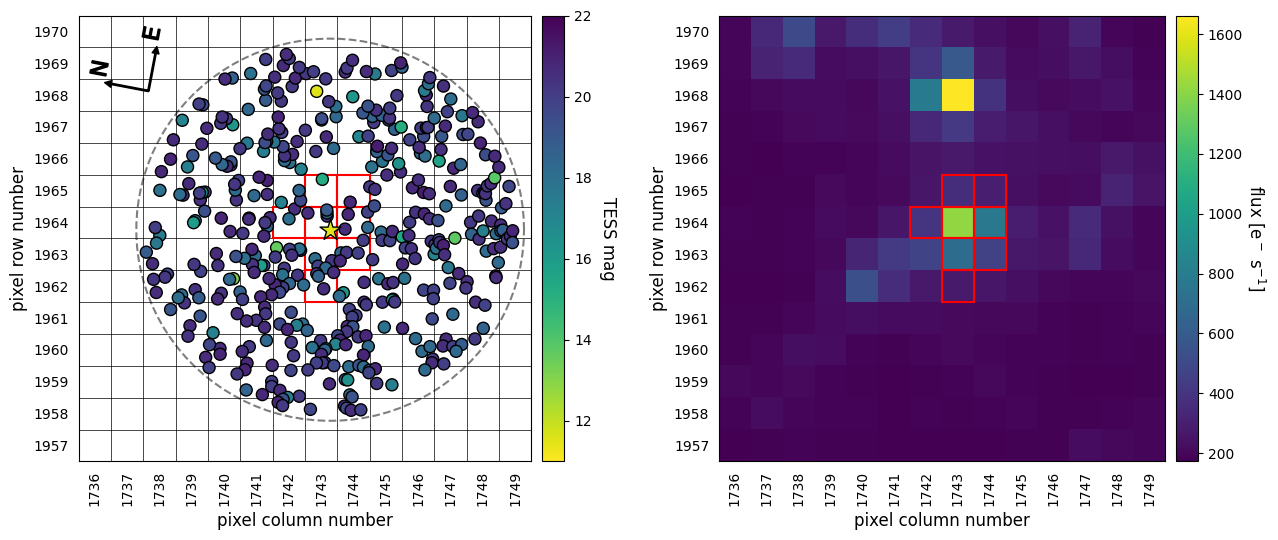

Sector 30


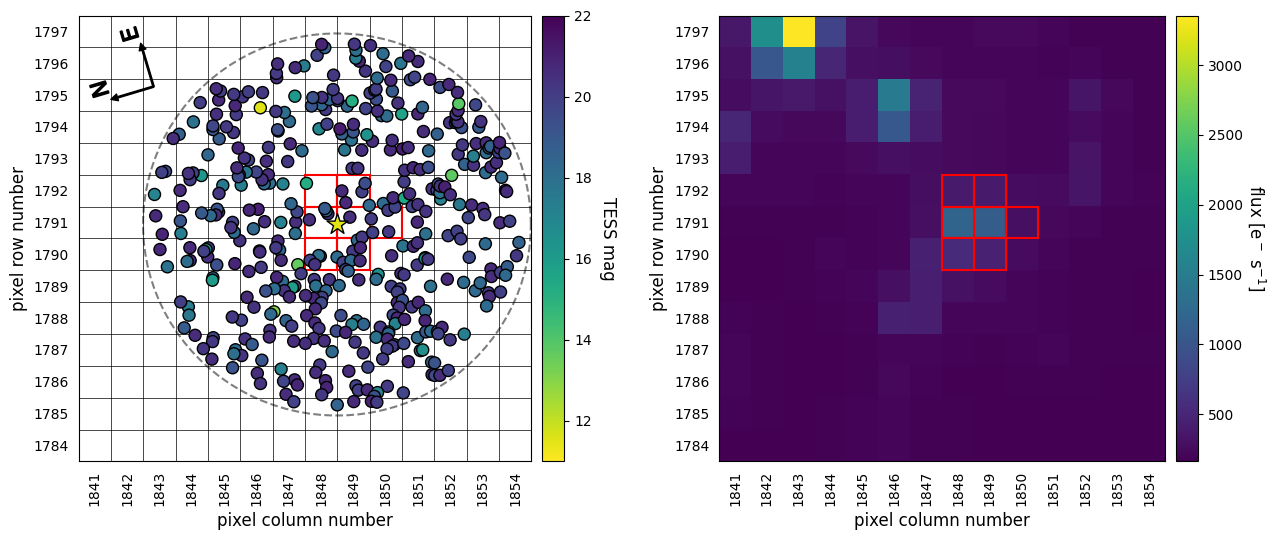

Sector 31


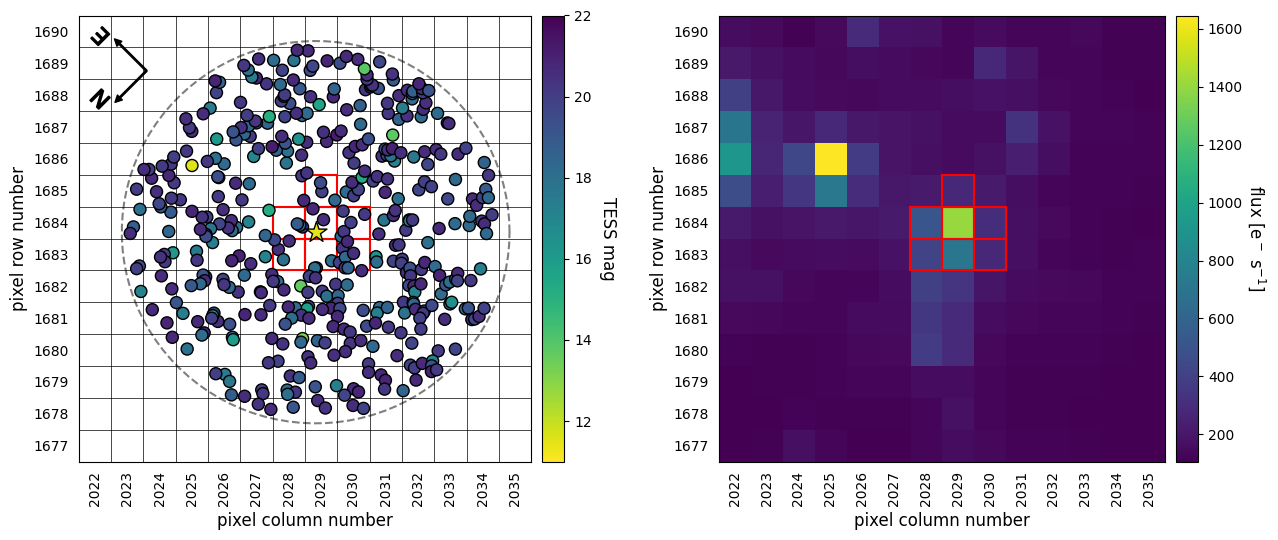

Sector 32


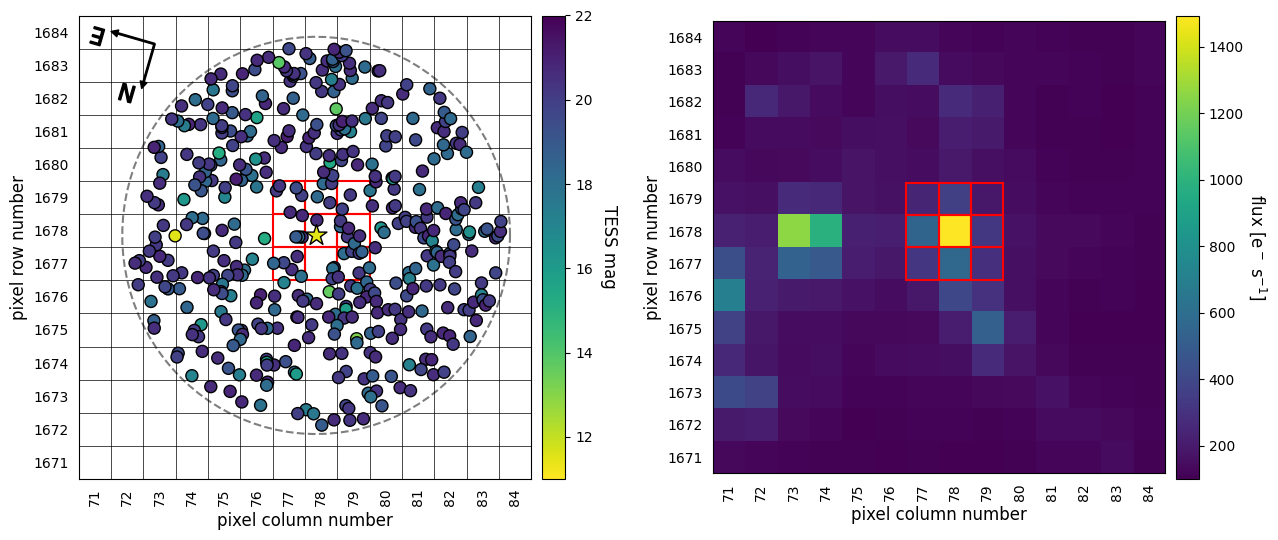

Sector 33


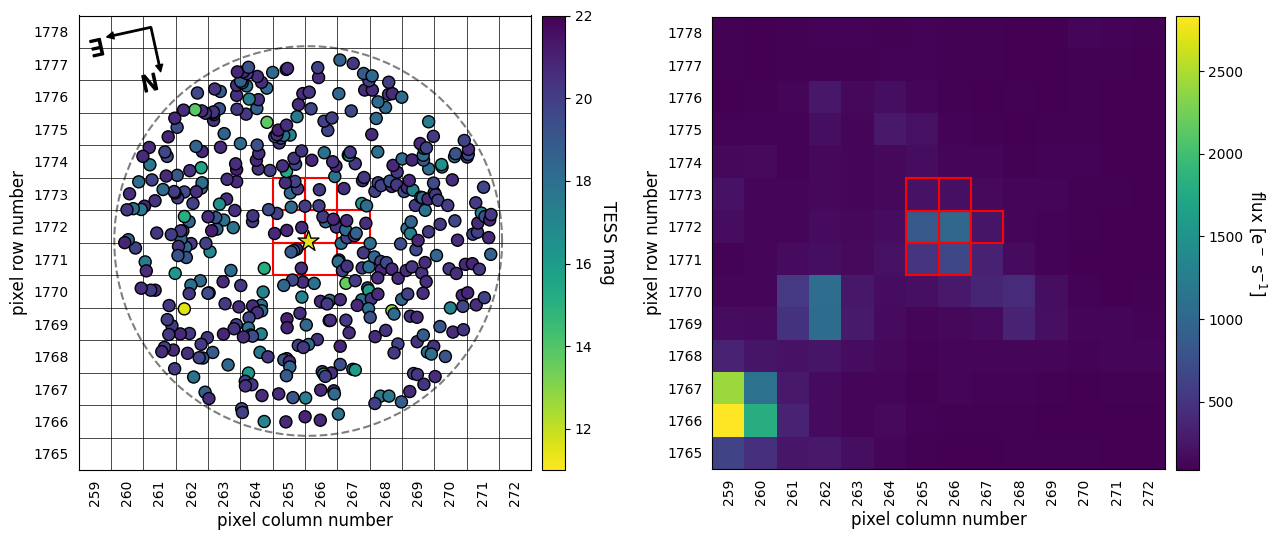

Sector 34


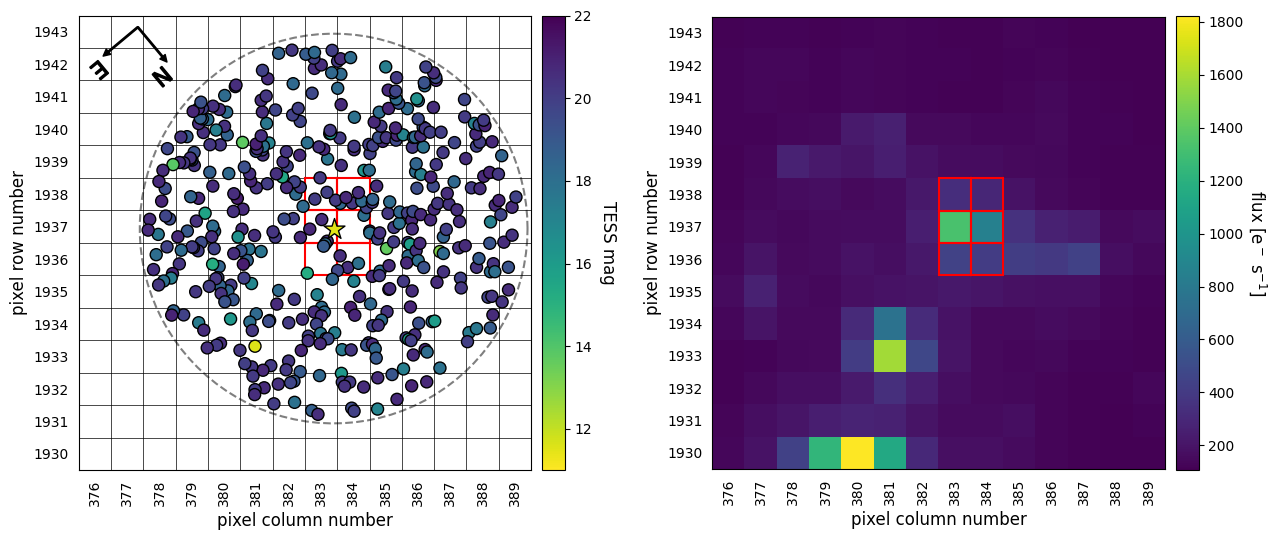

Sector 36


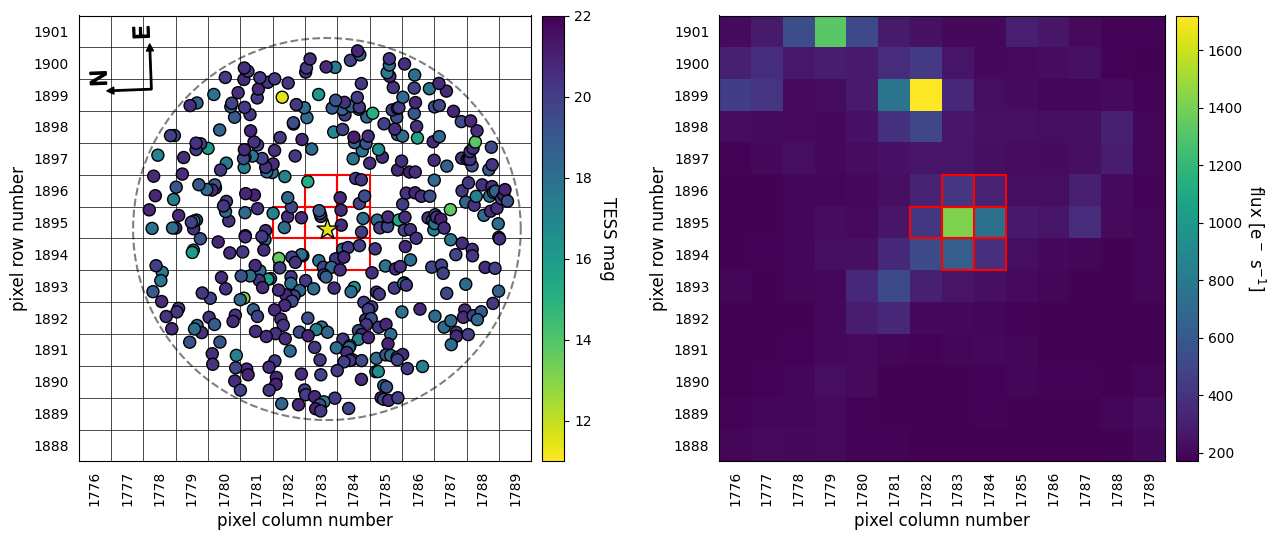

Sector 37


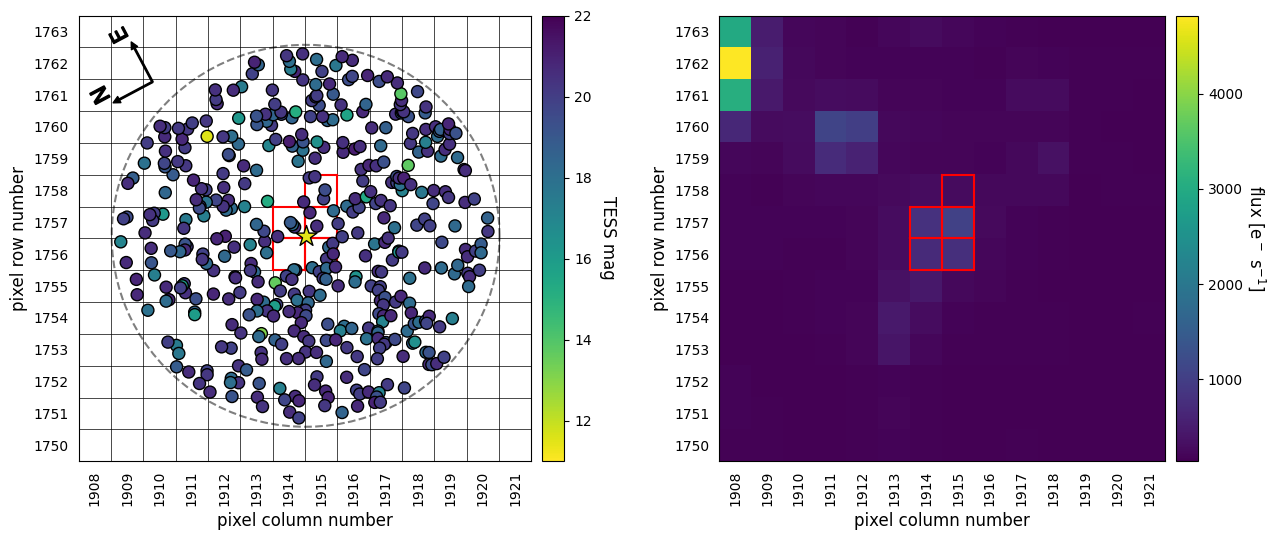

Sector 39


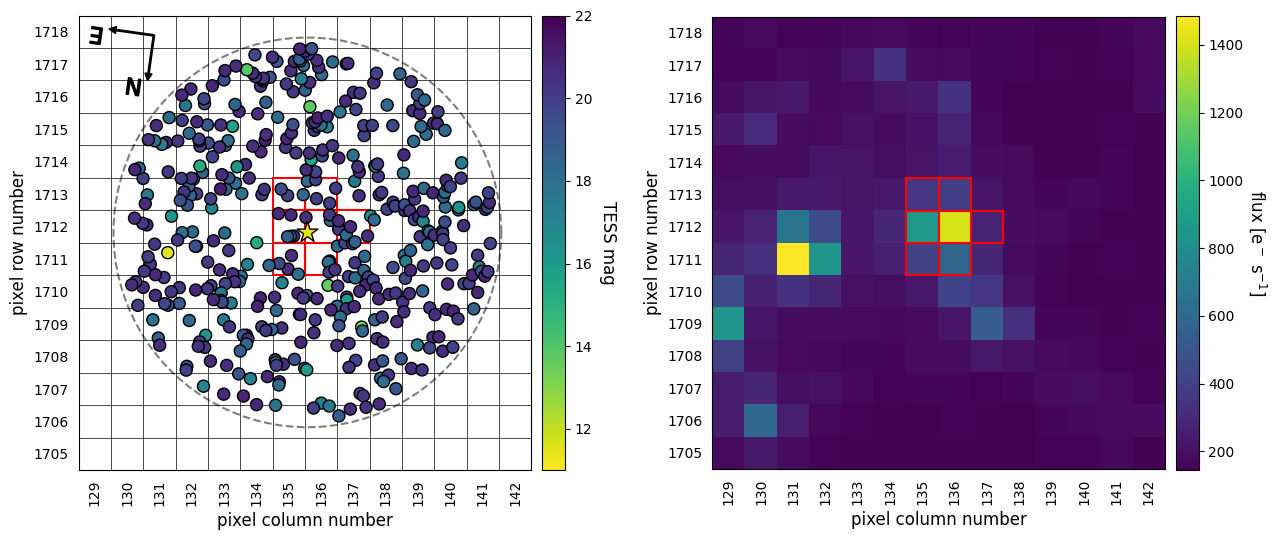

ID     Tmag    Jmag    Hmag    Kmag         ra        dec  mass  \
0    149598862  11.4800  11.878  11.994  12.074  86.997095 -64.384200  0.47   
1    733689661  20.3679     NaN     NaN     NaN  87.002565 -64.383193   NaN   
2    733689592  20.5448     NaN     NaN     NaN  86.998520 -64.386831   NaN   
3    733689678  18.1830     NaN     NaN     NaN  87.003904 -64.383061   NaN   
4    733689660  18.8677     NaN     NaN     NaN  87.005075 -64.382921   NaN   
..         ...      ...     ...     ...     ...        ...        ...   ...   
422  733689736  20.6086     NaN     NaN     NaN  86.957193 -64.355346   NaN   
423  733690580  18.8371     NaN     NaN     NaN  86.973300 -64.352179   NaN   
424  733689417  20.6984     NaN     NaN     NaN  87.057379 -64.405538   NaN   
425  733689379  19.8317     NaN     NaN     NaN  86.923959 -64.395880   NaN   
426  733690446  20.5464     NaN     NaN     NaN  87.051952 -64.360224   NaN   

      rad     Teff       plx  sep (arcsec)  PA (E of N)  
0    0.18  27500.0  4.377920         0.000        0.000  
1     NaN      NaN       NaN         9.254       66.937  
2     NaN      NaN  0.592850         9.726      166.820  
3     NaN      NaN  0.086426        11.364       68.854  
4     NaN      NaN  0.267799        13.247       69.661  
..    ...      ...       ...           ...          ...  
422   NaN      NaN       NaN       121.042      329.096  
423   NaN   5299.0  0.236592       121.085      342.169  
424   NaN      NaN       NaN       121.233      129.346  
425   NaN      NaN  0.117403       121.323      249.690  
426   NaN      NaN  0.862648       121.435       44.726  

[427 rows x 13 columns]

In [5]:
ap_29 = np.array([[1742.0, 1964.0], [1743.0, 1962.0], [1743.0, 1963.0], [1743.0, 1964.0],
      [1743.0, 1965.0], [1744.0, 1963.0], [1744.0, 1964.0], [1744.0, 1965.0]])
ap_30 = np.array([[1848.0, 1790.0], [1848.0, 1791.0], [1848.0, 1792.0], [1849.0, 1790.0],
      [1849.0, 1791.0], [1849.0, 1792.0], [1850.0, 1791.0]])
ap_31 = np.array([[2028.0, 1683.0], [2028.0,
        1684.0], [2029.0, 1683.0], [2029.0, 1684.0], [2029.0, 1685.0], [2030.0, 1683.0],
      [2030.0, 1684.0]])
ap_32 = np.array([[77.0, 1677.0], [77.0, 1678.0], [77.0, 1679.0], [78.0,
        1677.0], [78.0, 1678.0], [78.0, 1679.0], [79.0, 1677.0], [79.0, 1678.0], [
        79.0, 1679.0]])
ap_33 = np.array([[265.0, 1771.0], [265.0, 1772.0], [265.0, 1773.0], [
        266.0, 1771.0], [266.0, 1772.0], [266.0, 1773.0], [267.0, 1772.0]])
ap_34 = np.array([[383.0, 1936.0], [383.0, 1937.0], [383.0, 1938.0], [384.0, 1936.0],
       [384.0, 1937.0], [384.0, 1938.0]])
ap_36 = np.array([[1782.0, 1895.0], [1783.0, 1894.0], [1783.0,
        1895.0], [1783.0, 1896.0], [1784.0, 1894.0], [1784.0, 1895.0], [1784.0, 1896.0]])
ap_37 = np.array([[1914.0, 1756.0], [1914.0, 1757.0], [1915.0, 1756.0], [1915.0, 1757.0], [
        1915.0, 1758.0]])
ap_39 = np.array([[135.0, 1711.0], [135.0, 1712.0], [135.0, 1713.0],
      [136.0, 1711.0], [136.0, 1712.0], [136.0, 1713.0], [137.0, 1712.0]])

apertures = np.array([ap_29, ap_30, ap_31, ap_32, ap_33, ap_34, ap_36, ap_37, ap_39])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [6]:
tdepth = 0.248 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

ID     Tmag    Jmag    Hmag    Kmag         ra        dec  mass  \
0    149598862  11.4800  11.878  11.994  12.074  86.997095 -64.384200  0.47   
1    733689661  20.3679     NaN     NaN     NaN  87.002565 -64.383193   NaN   
2    733689592  20.5448     NaN     NaN     NaN  86.998520 -64.386831   NaN   
3    733689678  18.1830     NaN     NaN     NaN  87.003904 -64.383061   NaN   
4    733689660  18.8677     NaN     NaN     NaN  87.005075 -64.382921   NaN   
..         ...      ...     ...     ...     ...        ...        ...   ...   
422  733689736  20.6086     NaN     NaN     NaN  86.957193 -64.355346   NaN   
423  733690580  18.8371     NaN     NaN     NaN  86.973300 -64.352179   NaN   
424  733689417  20.6984     NaN     NaN     NaN  87.057379 -64.405538   NaN   
425  733689379  19.8317     NaN     NaN     NaN  86.923959 -64.395880   NaN   
426  733690446  20.5464     NaN     NaN     NaN  87.051952 -64.360224   NaN   

      rad     Teff       plx  sep (arcsec)  PA (E of N)     fluxratio  \
0    0.18  27500.0  4.377920         0.000        0.000  9.199804e-01   
1     NaN      NaN       NaN         9.254       66.937  2.371614e-04   
2     NaN      NaN  0.592850         9.726      166.820  2.105827e-04   
3     NaN      NaN  0.086426        11.364       68.854  1.715025e-03   
4     NaN      NaN  0.267799        13.247       69.661  8.801115e-04   
..    ...      ...       ...           ...          ...           ...   
422   NaN      NaN       NaN       121.042      329.096  8.387692e-13   
423   NaN   5299.0  0.236592       121.085      342.169  6.475766e-12   
424   NaN      NaN       NaN       121.233      129.346  1.364577e-11   
425   NaN      NaN  0.117403       121.323      249.690  4.731961e-11   
426   NaN      NaN  0.862648       121.435       44.726  1.356380e-12   

       tdepth  
0    0.000270  
1    0.000000  
2    0.000000  
3    0.144604  
4    0.281782  
..        ...  
422  0.000000  
423  0.000000  
424  0.000000  
425  0.000000  
426  0.000000  

[427 rows x 15 columns]

In [7]:
target.remove_star(drop_stars = np.array([733689678, 733689660, 733689593, 733689585, 733689655, 733689586, 733689588, 733689458, 733689524, 733689577,
                                          733689457, 733689523, 149598866, 149598859, 733689580, 149598854]))

In [8]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 149598862.
Calculating EB and EBx2P scenario probabilities for 149598862.
Calculating PTP scenario probability for 149598862.
Calculating PEB and PEBx2P scenario probabilities for 149598862.
Calculating STP scenario probability for 149598862.
Calculating SEB and SEBx2P scenario probabilities for 149598862.
Calculating DTP scenario probability for 149598862.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 149598862.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 149598862.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 149598862.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689678.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689660.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689595.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689593.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689578.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689585.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689655.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689586.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689582.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689588.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689576.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689458.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689524.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689656.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689577.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689457.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689523.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689575.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598866.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598871.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598870.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689579.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689657.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598859.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689602.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598869.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689580.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689569.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689551.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598855.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 733689527.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598872.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598854.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598856.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 149598878.
CPU times: user 1h 4min 5s, sys: 21 s, total: 1h 4min 26s
Wall time: 38min 38s


In [9]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.96222801
NFPP = 0.00714765


ID scenario   M_s       R_s     P_orb        inc         b  \
0    149598862       TP  0.47  0.180000  1.109004  87.715177  0.627140   
1    149598862       EB  0.47  0.180000  1.109004  85.296479  1.986513   
2    149598862    EBx2P  0.47  0.180000  2.218008  88.045751  1.029220   
3    149598862      PTP  0.47  0.180000  1.109004  87.358169  0.904833   
4    149598862      PEB  0.47  0.180000  1.109004  84.713423  1.973029   
..         ...      ...   ...       ...       ...        ...       ...   
115  149598856      NEB  1.24  0.879298  1.109004  84.537690  0.328054   
116  149598856   NEBx2P  1.24  0.879298  2.218008  88.834507  0.070314   
117  149598878      NTP  1.09  0.948487  1.109004  74.993056  0.776859   
118  149598878      NEB  1.09  0.948487  1.109004  71.990924  0.981441   
119  149598878   NEBx2P  1.09  0.948487  2.218008  64.606813  1.673077   

          ecc           w        R_p      M_EB      R_EB          prob  
0    0.695314  211.229874   0.596951  0.000000  0.000000  7.274308e-03  
1    0.005601  359.843672   0.000000  0.434682  0.180000  2.890622e-04  
2    0.609696  198.213475   0.000000  0.465165  0.180000  1.273010e-03  
3    0.171830  347.492876   0.521478  0.000000  0.000000  2.710342e-02  
4    0.000007  210.191824   0.000000  0.154780  0.180000  1.456409e-04  
..        ...         ...        ...       ...       ...           ...  
115  0.708837  353.729738   0.000000  0.695448  0.725924  8.483701e-06  
116  0.807545    7.108740   0.000000  1.181428  0.879298  2.155758e-06  
117  0.740504  339.153337  19.609187  0.000000  0.000000  1.796659e-06  
118  0.717046  347.980480   0.000000  0.508555  0.512984  1.087517e-05  
119  0.791334  355.314712   0.000000  1.075743  0.948487  8.465318e-07  

[120 rows x 13 columns]

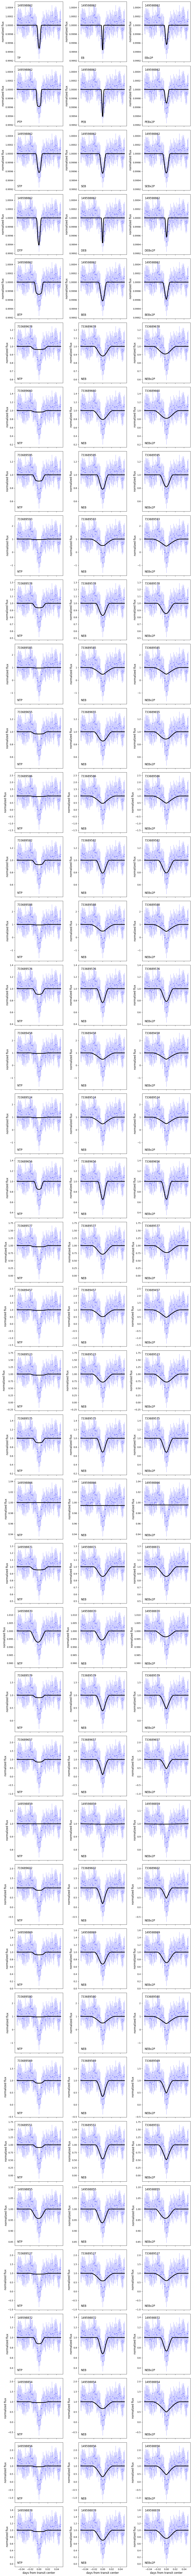

In [10]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
# Manually keeping count
# Repetition reduced
FPPs = np.zeros(10)
NFPPs = np.zeros(10)

In [22]:
# Results collected in process from before
F1 = 0.958385688877729
NF1 = 0.0073188758260522135

F2 = 0.9680753596970962
NF2 = 0.00706714617253367

F3 = 0.9613927279691603
NF3 = 0.007110981030589874

F4 = 0.9671729365748114
NF4 = 0.007069331645174209

F5 = 0.9671995235220653
NF5 = 0.007183521349407777

F6 = 0.9622280078959132
NF6 = 0.007147646656015434

F7 = 0.96539728
NF7 = 0.00696084

F8 = 0.96807533
NF8 = 0.00696929

F9 = 0.96655435
NF9 = 0.00702079

F10 = 0.96513626
NF10 = 0.00715951

In [14]:
# for i in range(1):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i] = target.FPP
#     NFPPs[i] = target.NFPP

In [15]:
# Small list
# print(FPPs)
# print(NFPPs)
# FPPs = 0.96513626
# NFPPs = 0.00715951

In [16]:
# for i in range(1):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i + 1] = target.FPP
#     NFPPs[i + 1] = target.NFPP

In [17]:
# Small list
# print(FPPs)
# print(NFPPs)
# FPPs = 0.96655435
# NFPPs = 0.00702079

In [18]:
# for i in range(1):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i + 2] = target.FPP
#     NFPPs[i + 2] = target.NFPP

In [19]:
# Small list
# print(FPPs)
# print(NFPPs)
# FPPs = 0.96807533
# NFPPs = 0.00696929

In [20]:
# for i in range(1):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i + 3] = target.FPP
#     NFPPs[i + 3] = target.NFPP

In [21]:
# Small list
# print(FPPs)
# print(NFPPs)
# FPPs = 0.96539728
# NFPPs = 0.00696084

In [23]:
# Finally:
FPPs = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
NFPPs = [NF1, NF2, NF3, NF4, NF5, NF6, NF7, NF8, NF9, NF10]

In [24]:
meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.9649423560596418 +/- 0.003256863559651127
NFPP = 0.007100793267977318 +/- 0.00010273905441713639


Our final conclusion about this specified planet of TIC 149598862 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).